In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.5.1     ✔ purrr   1.0.4
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# check out the 'trees' dataset pre-loaded into R
?trees

trees                 package:datasets                 R Documentation

_D_i_a_m_e_t_e_r, _H_e_i_g_h_t _a_n_d _V_o_l_u_m_e _f_o_r _B_l_a_c_k _C_h_e_r_r_y _T_r_e_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     This data set provides measurements of the diameter, height and
     volume of timber in 31 felled black cherry trees.  Note that the
     diameter (in inches) is erroneously labelled Girth in the data. It
     is measured at 4 ft 6 in above the ground.

_U_s_a_g_e:

     trees
     
_F_o_r_m_a_t:

     A data frame with 31 observations on 3 variables.

       ‘[,1]’  ‘Girth’   numeric  Tree diameter (rather than girth, actually) in inches 
       ‘[,2]’  ‘Height’  numeric  Height in ft                                          
       ‘[,3]’  ‘Volume’  numeric  Volume of timber in cubic ft                          
      
_S_o_u_r_c_e:

     Meyer, H. A. (1953) _Forest Mensuration_.  Penns Valley
     Publishers, Inc.

     Ryan, T. A., Joiner, B. L. and Ryan, B. F. (1976) _The Minitab
     Student Handbook_.  Duxbury Press.

_R_e_f_e_r_e_n_c_e_s:

     Atkinson, A. C. (1985) _Plots, Transformations and Regression_.
     Oxford University Press.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     pairs(trees, panel = panel.smooth, main = "trees data")
     plot(Volume ~ Girth, data = trees, log = "xy")
     coplot(log(Volume) ~ log(Girth) | Height, data = trees,
            panel = panel.smooth)
     summary(fm1 <- lm(log(Volume) ~ log(Girth), data = trees))
     summary(fm2 <- update(fm1, ~ . + log(Height), data = trees))
     step(fm2)
     ## i.e., Volume ~= c * Height * Girth^2  seems reasonable

In [6]:
# clean up the dataset and take a peek at it
cherry = trees %>% rename(diam = Girth, height = Height, vol = Volume)
head(cherry)
dim(cherry)

,diam,height,vol
,<dbl>,<dbl>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


[1] 31  3

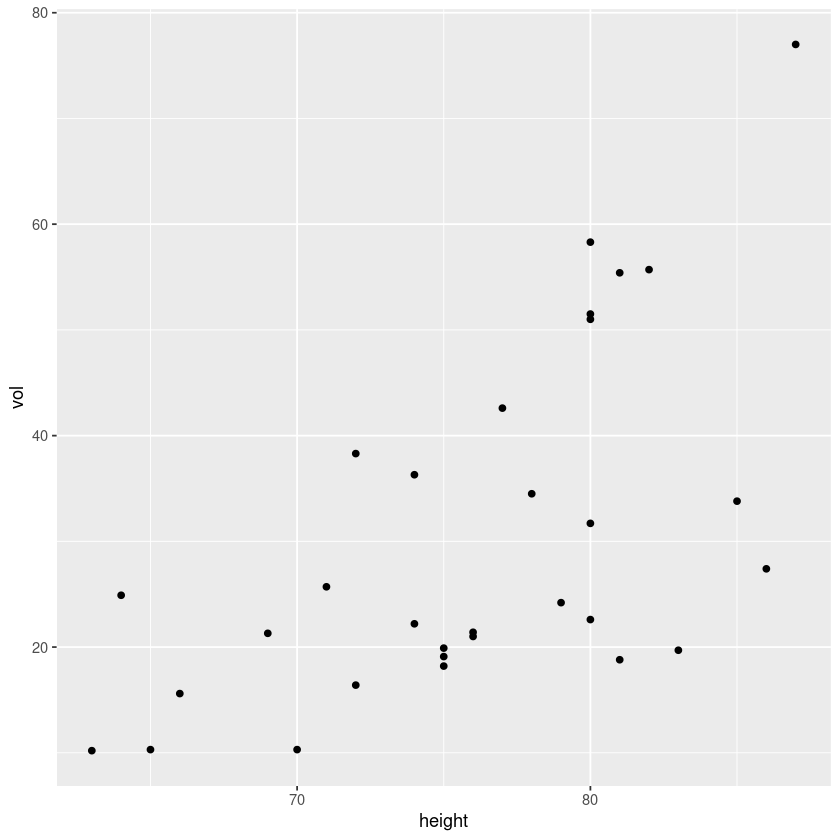

In [7]:
# visualize relationship between tree height and volume
ggplot(cherry, aes(x = height, y = vol)) + geom_point()

In [14]:
# fit a bivariate linear model predicting volume with height
height_model = lm(vol ~ height, cherry)
summary(height_model)


Call:
lm(formula = vol ~ height, data = cherry)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.274  -9.894  -2.894  12.068  29.852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.1236    29.2731  -2.976 0.005835 ** 
height        1.5433     0.3839   4.021 0.000378 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.4 on 29 degrees of freedom
Multiple R-squared:  0.3579,	Adjusted R-squared:  0.3358 
F-statistic: 16.16 on 1 and 29 DF,  p-value: 0.0003784


In [17]:
# take a look at the parameters learned by the model 
height_model$coefficients

(Intercept)      height 
  -87.12361     1.54335

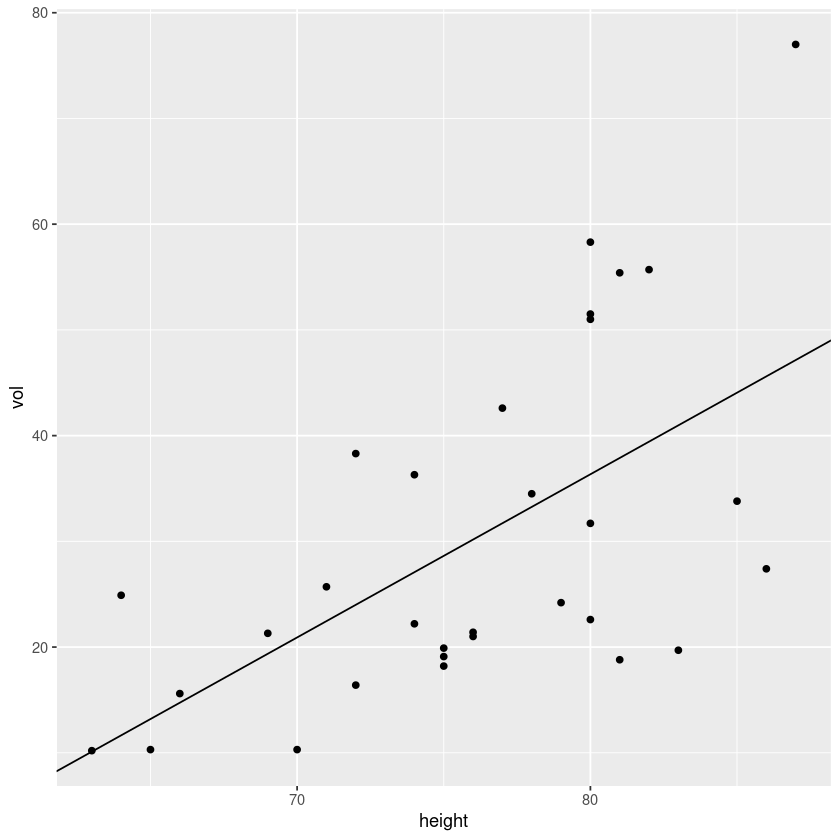

In [18]:
# re-generate the scatterplot with the regression line we just fit
ggplot(cherry, aes(x = height, y = vol)) + 
    geom_point() + 
    geom_abline(slope = height_model$coefficients[2], 
                intercept = height_model$coefficients[1])

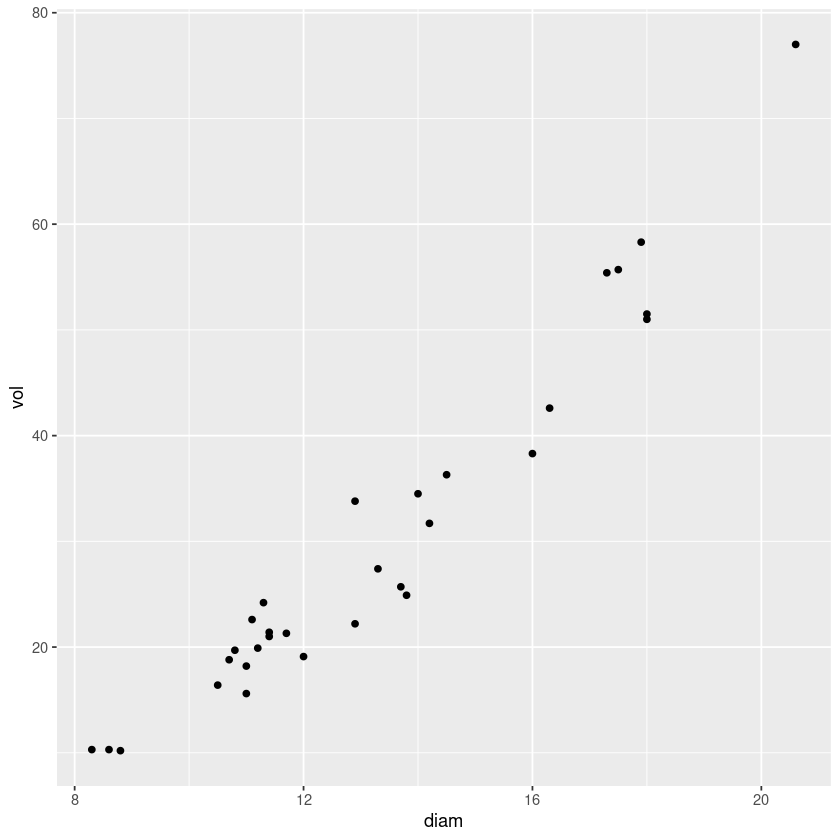

In [8]:
# do this all over again for volume instead of height - which performs better?
ggplot(cherry, aes(x = diam, y = vol)) + geom_point()

In [20]:
diam_model = lm(vol ~ diam, cherry)
summary(diam_model)


Call:
lm(formula = vol ~ diam, data = cherry)

Residuals:
   Min     1Q Median     3Q    Max 
-8.065 -3.107  0.152  3.495  9.587 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.9435     3.3651  -10.98 7.62e-12 ***
diam          5.0659     0.2474   20.48  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.252 on 29 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9331 
F-statistic: 419.4 on 1 and 29 DF,  p-value: < 2.2e-16


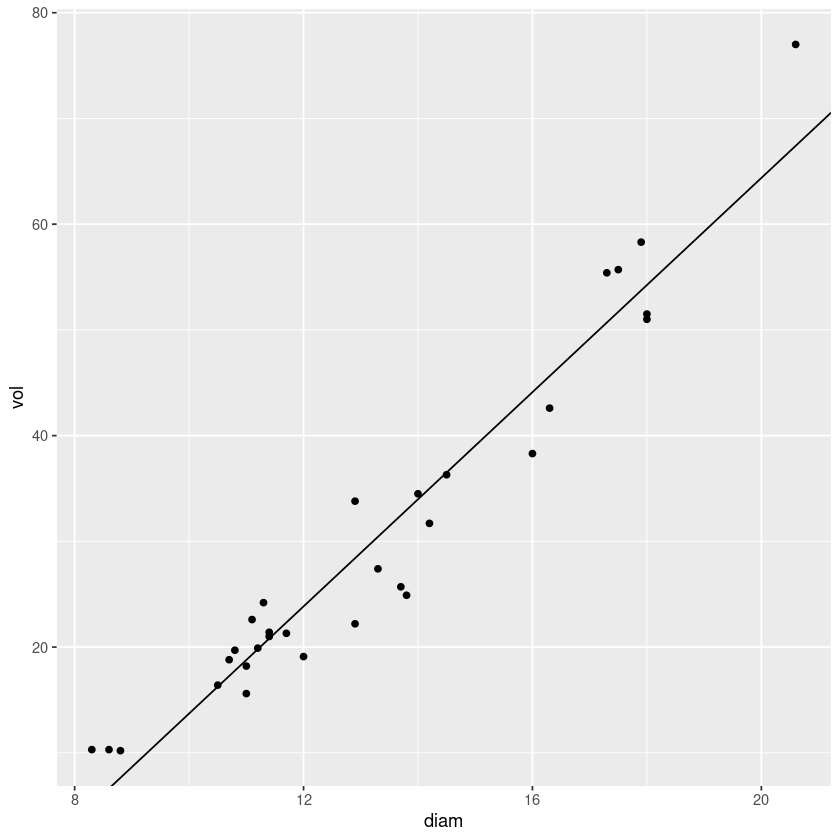

In [21]:
ggplot(cherry, aes(x = diam, y = vol)) + 
    geom_point() + 
    geom_abline(slope = diam_model$coefficients[2], 
                intercept = diam_model$coefficients[1])

In [23]:
# try putting both predictor variables into the model (i.e. use height as a covariate)
full_model = lm(vol ~ diam + height, cherry)
summary(full_model)


Call:
lm(formula = vol ~ diam + height, data = cherry)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
diam          4.7082     0.2643  17.816  < 2e-16 ***
height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


In [25]:
# compare the models to each other with AIC - lower is better
AIC(height_model)
AIC(diam_model)
AIC(full_model)

[1] 252.7986

[1] 181.6447

[1] 176.91